## Importing Libraries

In [10]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# fetching California housing dataset 
housing_data = fetch_california_housing()

# Organize features and target values into DataFrames, concatenate them, and print column names.
descr = housing_data['DESCR']
feature_names = housing_data['feature_names']
data = housing_data['data']
target = housing_data['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
 4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing = pd.concat([df1, df2], axis=1)
print(housing.columns)




Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


## Display Data

In [11]:
#displays the first 5 rows of the DataFrame 'housing', allowing quick inspection of its structure, content.

housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# Print the dimensions of the 'housing' DataFrame.
print('dimension of housing data: {}'.format(housing.shape))

dimension of housing data: (20640, 9)


In [14]:
# Display concise information about the 'housing' DataFrame.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Split Data, Train KNeighborsRegressor, and Plot R² Scores

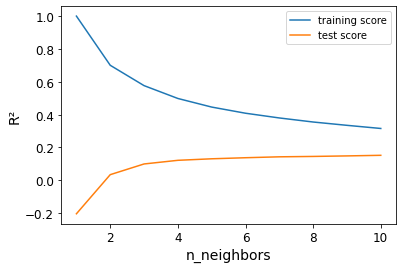

In [17]:
# Split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.loc[:, housing.columns != 'Target'], housing['Target'], random_state=66)


# train KNeighborsRegressor with varying neighbors

from sklearn.neighbors import KNeighborsRegressor
training_score = []
test_score = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 knn = KNeighborsRegressor(n_neighbors=n_neighbors)
 knn.fit(X_train, y_train)
 # record training set score
 training_score.append(knn.score(X_train, y_train))
 # record test set score
 test_score.append(knn.score(X_test, y_test))

# plot and save R² scores for training and test sets.

plt.plot(neighbors_settings, training_score, label='training score')
plt.plot(neighbors_settings, test_score, label='test score')
plt.ylabel('R²')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('knn_compare_model')

## Evaluate KNN Regressor (k=10) on Training and Test Sets

In [18]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
k1 = knn.score(X_train, y_train)
k2 = knn.score(X_test, y_test)
print('R² of KNN Regressor on training set: {:.3f}'.format(k1))
print('R² of KNN Regressor on test set: {:.3f}'.format(k2))

R² of KNN Regressor on training set: 0.316
R² of KNN Regressor on test set: 0.152


## Evaluate Linear Regression on Training and Test Sets

In [19]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
l1 = linreg.score(X_train, y_train)
l2 = linreg.score(X_test, y_test)
print('R² of Linear Regression on training set: {:.3f}'.format(l1))
print('R² of Linear Regression on test set: {:.3f}'.format(l2))

R² of Linear Regression on training set: 0.603
R² of Linear Regression on test set: 0.609


## Evaluate Decision Tree Regressor on Training and Test Sets

In [20]:
housing_features = [x for i,x in enumerate(housing.columns) if i!=8]
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
t1 = tree.score(X_train, y_train)
t2 = tree.score(X_test, y_test)
print('R² of Decision Tree Regressor on training set: {:.3f}'.format(t1))
print('R² of Decision Tree Regressor on test set: {:.3f}'.format(t2))

R² of Decision Tree Regressor on training set: 1.000
R² of Decision Tree Regressor on test set: 0.609


## Evaluate Decision Tree Regressor (Max Depth=3) on Training and Test Sets

In [21]:
tree1 = DecisionTreeRegressor(max_depth=3, random_state=0)
tree1.fit(X_train, y_train)
t3 = tree1.score(X_train, y_train)
t4 = tree1.score(X_test, y_test)
print('R² of Decision Tree Regressor on training set: {:.3f}'.format(t3))
print('R² of Decision Tree Regressor on test set: {:.3f}'.format(t4))

R² of Decision Tree Regressor on training set: 0.531
R² of Decision Tree Regressor on test set: 0.539


In [23]:
# Print feature importances obtained from the Decision Tree Regressor with max depth of 3.
print('Feature importances:\n{}'.format(tree1.feature_importances_))

Feature importances:
[0.8490424  0.         0.02807079 0.         0.         0.12288681
 0.         0.        ]


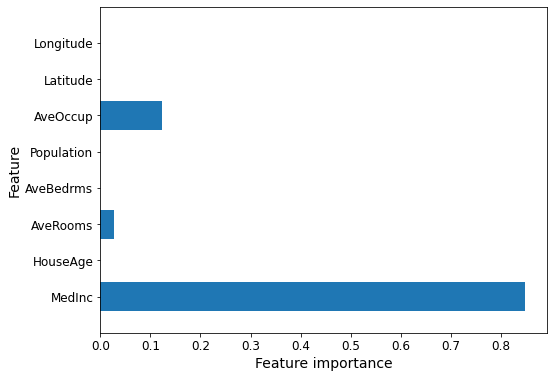

In [25]:
# Plot Feature Importances for Decision Tree Regressor (Max Depth=3)

def plot_feature_importances_housing(model):
 plt.figure(figsize=(8,6))
 n_features = 8
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), housing_features)
 plt.xlabel('Feature importance')
 plt.ylabel('Feature')
 plt.ylim(-1, n_features)
plot_feature_importances_housing(tree1)
plt.savefig('feature_importance')

## Evaluate Random Forest Regressor on Training and Test Sets

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

R² of Random Forest Regressor on training set: 0.973
R² of Random Forest Regressor on test set: 0.812


## Evaluate Random Forest Regressor (Max Depth=7) on Training and Test Sets

In [27]:
rf1 = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
r3 = rf1.score(X_train, y_train)
r4 = rf1.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r3))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r4))

R² of Random Forest Regressor on training set: 0.762
R² of Random Forest Regressor on test set: 0.733


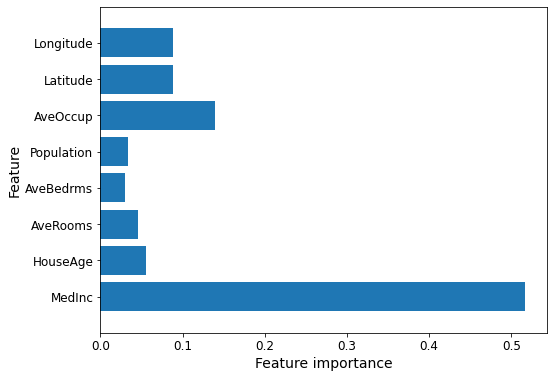

In [28]:
# Plot feature importances obtained from the Random Forest Regressor.

plot_feature_importances_housing(rf)

## Evaluate Gradient Boosting Regressor on Training and Test Sets

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
g1 = gb.score(X_train, y_train)
g2 = gb.score(X_test, y_test)
print('R^2 of Gradient Boosting Regressor on training set: {:.3f}'.format(g1))
print('R^2 of Gradient Boosting Regressor on test set: {:.3f}'.format(g2))

R^2 of Gradient Boosting Regressor on training set: 0.808
R^2 of Gradient Boosting Regressor on test set: 0.795


In [30]:
# Evaluate Gradient Boosting Regressor (Max Depth=4) on Training and Test Sets

gb1 = GradientBoostingRegressor(random_state=0, max_depth=4)
gb1.fit(X_train, y_train)
g3 = gb1.score(X_train, y_train)
g4 = gb1.score(X_test, y_test)
print('R² of Gradient Boosting Regressor on training set: {:.3f}'.format(g3))
print('R² of Gradient Boosting Regressor on test set: {:.3f}'.format(g4))

R² of Gradient Boosting Regressor on training set: 0.842
R² of Gradient Boosting Regressor on test set: 0.814


In [31]:
Evaluate Gradient Boosting Regressor (Learning Rate=0.15) on Training and Test Sets

gb2 = GradientBoostingRegressor(random_state=0, learning_rate=0.15)
gb2.fit(X_train, y_train)
g5 = gb2.score(X_train, y_train)
g6 = gb2.score(X_test, y_test)
print('R² of Gradient Boosting Regressor on training set: {:.3f}'.format(g5))
print('R² of Gradient Boosting Regressor on test set: {:.3f}'.format(g6))

R² of Gradient Boosting Regressor on training set: 0.823
R² of Gradient Boosting Regressor on test set: 0.808


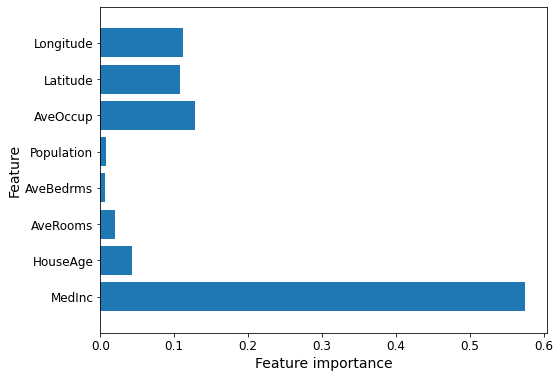

In [32]:
# Plot Feature Importances for Gradient Boosting Regressor (Max Depth=4)
plot_feature_importances_housing(gb1)

## Evaluate Support Vector Regressor on Training and Test Sets

In [33]:
# Train a Support Vector Regressor and calculate R² scores on the training and test sets.

from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
s1 = svr.score(X_train, y_train)
s2 = svr.score(X_test, y_test)
print('R² of Support Vector Regressor on training set: {:.3f}'.format(s1))
print('R² of Support Vector Regressor on test set: {:.3f}'.format(s2))

R² of Support Vector Regressor on training set: -0.023
R² of Support Vector Regressor on test set: -0.033


## Evaluate Scaled Support Vector Regressor on Training and Test Sets

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svr1 = SVR()
svr1.fit(X_train_scaled, y_train)
s3 = svr1.score(X_train_scaled, y_train)
s4 = svr1.score(X_test_scaled, y_test)
print('R² of Support Vector Regressor on training set: {:.3f}'.format(s3))
print('R² of Support Vector Regressor on test set: {:.3f}'.format(s4))

R² of Support Vector Regressor on training set: 0.659
R² of Support Vector Regressor on test set: 0.663


## Evaluate Support Vector Regressor with Gamma=10 on Training and Test Sets

In [35]:
svr2 = SVR(gamma=10)
svr2.fit(X_train_scaled, y_train)
s5 = svr2.score(X_train_scaled, y_train)
s6 = svr2.score(X_test_scaled, y_test)
print('R² of Support Vector Regressor on training set: {:.3f}'.format(s5))
print('R² of Support Vector Regressor on test set: {:.3f}'.format(s6))

R² of Support Vector Regressor on training set: 0.702
R² of Support Vector Regressor on test set: 0.697


## Evaluate MLP Regressor on Training and Test Sets

In [36]:
# Train a Multi-Layer Perceptron Regressor and calculate R² scores on the training and test sets.

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
m1 = mlp.score(X_train, y_train)
m2 = mlp.score(X_test, y_test)
print('R² of MLP Regressor on training set: {:.3f}'.format(m1))
print('R² of MLP Regressor on test set: {:.3f}'.format(m2))

R² of MLP Regressor on training set: 0.502
R² of MLP Regressor on test set: 0.459


## Evaluate Scaled MLP Regressor on Training and Test Sets

In [37]:
# Standardize features using Standard Scaler, 
# then train an MLP Regressor and calculate R² scores on the training and test sets.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp1 = MLPRegressor(random_state=0)
mlp1.fit(X_train_scaled, y_train)
m3 = mlp1.score(X_train_scaled, y_train)
m4 = mlp1.score(X_test_scaled, y_test)
print('R² of MLP Regressor on training set: {:.3f}'.format(m3))
print('R² of MLP Regressor on test set: {:.3f}'.format(m4))

R² of MLP Regressor on training set: 0.773
R² of MLP Regressor on test set: 0.723


## Evaluate MLP Regressor (Max Iterations=1000) on Training and Test Sets

In [38]:
# Train an MLP Regressor with increased maximum iterations and calculate R² scores on the training and test sets.

mlp2 = MLPRegressor(max_iter=1000, random_state=0)
mlp2.fit(X_train_scaled, y_train)
m5 = mlp2.score(X_train_scaled, y_train)
m6 = mlp2.score(X_test_scaled, y_test)
print('R² of MLP Regressor on training set: {:.3f}'.format(m5))
print('R² of MLP Regressor on test set: {:.3f}'.format(m6))

R² of MLP Regressor on training set: 0.773
R² of MLP Regressor on test set: 0.723


## Evaluate MLP Regressor (Max Iterations=1000, Alpha=1) on Training and Test Sets

In [39]:
# Train an MLP Regressor with increased maximum iterations and regularization (alpha=1), 
# then calculate R² scores on the training and test sets.

mlp3 = MLPRegressor(max_iter=1000, alpha=1, random_state=0)
mlp3.fit(X_train_scaled, y_train)
m7 = mlp3.score(X_train_scaled, y_train)
m8 = mlp3.score(X_test_scaled, y_test)
print('R² of MLP Regressor on training set: {:.3f}'.format(m7))
print('R² of MLP Regressor on test set: {:.3f}'.format(m8))

R² of MLP Regressor on training set: 0.740
R² of MLP Regressor on test set: 0.714


## Compare Regression Models on Test Set

In [40]:
# Create and sort a DataFrame to compare the R² scores of different regression models on the test set.

models = ['KNN Regressor', 'Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor',
 'Gradient Boosting Regressor','Support Vector Regressor', 'MLP Regressor']
tests_score = [k2, l2, t4, r2, g4, s6, m8]
compare_models = pd.DataFrame({ 'Algorithms': models, 'Tests Score': tests_score })
compare_models.sort_values(by = 'Tests Score', ascending = False)

,Algorithms,Tests Score
4,Gradient Boosting Regressor,0.813916
3,Random Forest Regressor,0.812289
6,MLP Regressor,0.713938
5,Support Vector Regressor,0.696627
1,Linear Regression,0.609141
2,Decision Tree Regressor,0.539000
0,KNN Regressor,0.152372


## Barplot of Regression Model Comparison

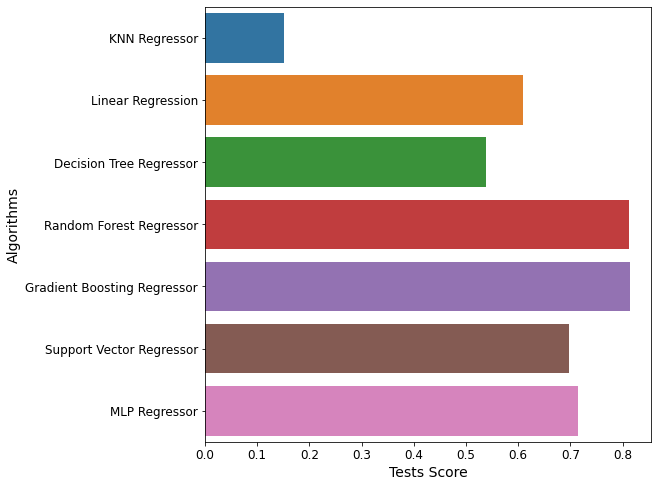

In [41]:
#Visualize and compare the R² scores of different regression models using a barplot.
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sb.barplot(x = 'Tests Score', y = 'Algorithms', data = compare_models)
plt.show()